Script that trains MAVE-NN GE pairwise model on GB1 data from Olson et al. (2019)

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

import sys
#path_to_mavenn = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn'
path_to_mavenn = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/'
sys.path.insert(0,path_to_mavenn)

import mavenn

In [2]:
mavenn.__path__

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/mavenn']

In [3]:
# Load example data (WHICH CONTAINS DOUBLE MUTANTS ONLY!)
data_df = mavenn.load_example_dataset('gb1')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 26,364
training + validation N: 504,373


,set,dist,input_ct,selected_ct,y,x
0,training,2,173,33,-3.145154,AAKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
1,training,2,18,8,-1.867676,ACKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
2,training,2,66,2,-5.270800,ADKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
3,training,2,72,1,-5.979498,AEKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
4,training,2,69,168,0.481923,AFKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
5,training,2,108,1,-6.557858,AGKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
6,training,2,48,93,0.150206,AHKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
7,training,2,119,49,-2.052708,AIKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
8,training,2,252,79,-2.450739,ALKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
9,training,2,110,116,-0.713724,AMKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...


In [4]:
len(data_df)

504373

In [5]:
L = len(data_df['x'][0])

In [6]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

In [7]:
# Define model
model = mavenn.Model(L=L,
                     alphabet='protein',
                     gpmap_type='additive', 
                     regression_type='GE',
                     ge_noise_model_type='SkewedT',
                     theta_regularization=0.1,
                     ge_heteroskedasticity_order=2)


In [8]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               shuffle=True)

N = 504,373 observations set as training data.
Using 20.0% for validation.
Data shuffled.
Time to set data: 24.4 sec.


In [9]:
# Fit model to data
model.fit(learning_rate=.0005,
          epochs=1000,
          batch_size=500,
          early_stopping=True,
          try_tqdm=False,
          early_stopping_patience=30,
          linear_initialization=True)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has   403605 rows  and     1100 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =     1100

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  6.353e+02  6.423e+04   1.0e+00  1.6e-01
     1  2.49878e-05  6.349e+02  6.408e+04   1.0e+00  3.5e-01  2.9e+02  1.0e+00
     2  2.78210e-02  3.594e+02  7.662e+03   5.7e-01  4.7e-03  4.5e+03  3.0e+01
     3  3.20716e-02  2.994e+02  6.129e+03   4.7e-01  4.5e-03  4.5e+03  1.4e+02
     4  3.92739e-02  2.331e+02  3.851e+02   3.7e-01  3.6e-04  4.5e+03  8.3e+01
     5  3.93100e-02  2.331e+02  3.781e+02   3.7e-01  3.6e-04  4.5e+03  8.3e+01
     6  3.99857e-02  2.331e+02  2.086e+02   3.7e-01  1.4e-04  6.4e+03  8.3e+01
     7  4.51085e-02  2.330e+02  1.437e+02   3.7e-01  9.6e-05  6.4e+03  1.5e+02
     8  5.01771e-02  2.330e+02  2.345e+01   3.7e-01  1.6e-05  6.4e+03  1.1

Epoch 47/1000
808/808 [==============================] - 3s 4ms/step - loss: -132.9689 - I_var: 2.1879 - val_loss: -133.0055 - val_I_var: 2.1918
Epoch 48/1000
808/808 [==============================] - 3s 4ms/step - loss: -131.3834 - I_var: 2.1883 - val_loss: -129.4110 - val_I_var: 2.1813
Epoch 49/1000
808/808 [==============================] - 3s 4ms/step - loss: -132.1839 - I_var: 2.1878 - val_loss: -132.8975 - val_I_var: 2.1913
Epoch 50/1000
808/808 [==============================] - 3s 4ms/step - loss: -131.6464 - I_var: 2.1875 - val_loss: -131.8170 - val_I_var: 2.1881
Epoch 51/1000
808/808 [==============================] - 3s 4ms/step - loss: -131.3172 - I_var: 2.1876 - val_loss: -132.2977 - val_I_var: 2.1893
Epoch 52/1000
808/808 [==============================] - 3s 4ms/step - loss: -131.5270 - I_var: 2.1885 - val_loss: -133.5286 - val_I_var: 2.1928
Epoch 53/1000
808/808 [==============================] - 3s 4ms/step - loss: -132.4694 - I_var: 2.1875 - val_loss: -133.2577 - val

808/808 [==============================] - 3s 4ms/step - loss: -131.9526 - I_var: 2.1869 - val_loss: -131.8903 - val_I_var: 2.1847
Epoch 104/1000
808/808 [==============================] - 3s 4ms/step - loss: -136.2010 - I_var: 2.1882 - val_loss: -133.9994 - val_I_var: 2.1907
Epoch 105/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.0442 - I_var: 2.1879 - val_loss: -133.5030 - val_I_var: 2.1892
Epoch 106/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.5050 - I_var: 2.1881 - val_loss: -134.2256 - val_I_var: 2.1913
Epoch 107/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.0241 - I_var: 2.1879 - val_loss: -134.0854 - val_I_var: 2.1908
Epoch 108/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.0502 - I_var: 2.1876 - val_loss: -134.1682 - val_I_var: 2.1911
Epoch 109/1000
808/808 [==============================] - 3s 4ms/step - loss: -133.1502 - I_var: 2.1870 - val_loss: -130.3415 - val_I_var: 

808/808 [==============================] - 3s 4ms/step - loss: -134.6187 - I_var: 2.1889 - val_loss: -133.6458 - val_I_var: 2.1873
Epoch 160/1000
808/808 [==============================] - 3s 4ms/step - loss: -132.8643 - I_var: 2.1881 - val_loss: -135.1113 - val_I_var: 2.1916
Epoch 161/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.9047 - I_var: 2.1878 - val_loss: -133.3653 - val_I_var: 2.1864
Epoch 162/1000
808/808 [==============================] - 3s 4ms/step - loss: -133.4601 - I_var: 2.1872 - val_loss: -130.5247 - val_I_var: 2.1783
Epoch 163/1000
808/808 [==============================] - 3s 4ms/step - loss: -132.9559 - I_var: 2.1882 - val_loss: -131.3707 - val_I_var: 2.1806
Epoch 164/1000
808/808 [==============================] - 3s 4ms/step - loss: -133.4586 - I_var: 2.1874 - val_loss: -133.4696 - val_I_var: 2.1866
Epoch 165/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.5019 - I_var: 2.1880 - val_loss: -133.2279 - val_I_var: 

808/808 [==============================] - 3s 4ms/step - loss: -132.8301 - I_var: 2.1872 - val_loss: -135.6753 - val_I_var: 2.1916
Epoch 216/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.7228 - I_var: 2.1882 - val_loss: -135.8579 - val_I_var: 2.1921
Epoch 217/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.6981 - I_var: 2.1883 - val_loss: -135.8803 - val_I_var: 2.1921
Epoch 218/1000
808/808 [==============================] - 3s 4ms/step - loss: -133.4789 - I_var: 2.1877 - val_loss: -135.8684 - val_I_var: 2.1921
Epoch 219/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.6287 - I_var: 2.1885 - val_loss: -135.0844 - val_I_var: 2.1897
Epoch 220/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.9922 - I_var: 2.1871 - val_loss: -135.7714 - val_I_var: 2.1917
Epoch 221/1000
808/808 [==============================] - 3s 4ms/step - loss: -134.3215 - I_var: 2.1875 - val_loss: -131.8905 - val_I_var: 

808/808 [==============================] - 3s 4ms/step - loss: -132.2206 - I_var: 2.1849 - val_loss: -134.7718 - val_I_var: 2.1874
Epoch 272/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.5583 - I_var: 2.1879 - val_loss: -135.8382 - val_I_var: 2.1905
Epoch 273/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.8963 - I_var: 2.1873 - val_loss: -129.5470 - val_I_var: 2.1722
Epoch 274/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.0674 - I_var: 2.1884 - val_loss: -132.9344 - val_I_var: 2.1820
Epoch 275/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.1250 - I_var: 2.1869 - val_loss: -135.9938 - val_I_var: 2.1908
Epoch 276/1000
808/808 [==============================] - 3s 4ms/step - loss: -135.9833 - I_var: 2.1884 - val_loss: -134.4436 - val_I_var: 2.1863
Epoch 277/1000
808/808 [==============================] - 3s 3ms/step - loss: -134.8181 - I_var: 2.1872 - val_loss: -136.2953 - val_I_var: 

In [10]:
# Save model
model.save('gb1_ge_additive')

Model saved to these files:
	gb1_ge_additive.pickle
	gb1_ge_additive.h5


On test data:
I_var_test: 2.179 +- 0.014 bits
I_pred_test: 2.228 +- 0.007 bits


Text(0.5, 1.0, 'training history - subsampled model')

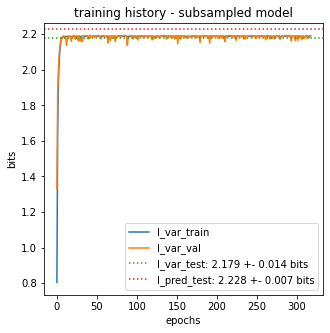

In [11]:
# Show training history
print('On test data:')

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[5,5])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.axhline(I_var, color='C2', linestyle=':', label=f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits')
ax.axhline(I_pred, color='C3', linestyle=':', label=f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training history - subsampled model')

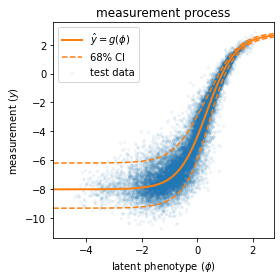

In [12]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.05, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

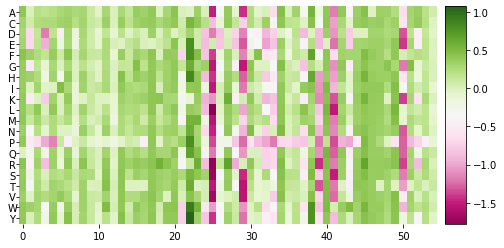

In [13]:
# Plot pairwise parameters
theta = model.get_theta()
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap(values=theta['theta_lc'],
                        alphabet=theta['alphabet'],
                        ax=ax,
                        cmap='PiYG');

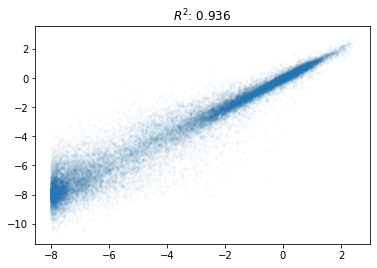

In [14]:
yhat_test = model.x_to_yhat(x_test)
Rsq = np.corrcoef(y_test,yhat_test)[0][1]**2

plt.title('$R^2$: '+str(Rsq)[0:5])
plt.scatter(yhat_test,y_test,s=5,alpha=0.02)

In [15]:
gb1_sim_model = model.bootstrap(data_df=data_df,num_models=1)

Training set   :  477,854 observations (  94.74%)
Validation set :   26,519 observations (   5.26%)
Test set       :        0 observations (   0.00%)
-------------------------------------------------
Total dataset  :  504,373 observations ( 100.00%)

training model 0 ...
N = 504,373 observations set as training data.
Using 5.3% for validation.
Data shuffled.
Time to set data: 16.3 sec.
 
LSMR            Least-squares solution of  Ax = b

The matrix A has   477854 rows  and     1100 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =     1100

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  6.912e+02  7.552e+04   1.0e+00  1.6e-01
     1  7.88439e-03  5.762e+02  6.493e+04   8.3e-01  8.5e-01  1.3e+02  1.0e+00
     2  2.98411e-02  3.949e+02  9.192e+03   5.7e-01  4.7e-03  4.9e+03  9.6e+00
     3  3.09559e-02  3.896e+02  9.075e+03   5.6e-01  4.7e-03  4.9e+03  8.0e+01
 

956/956 [==============================] - 3s 3ms/step - loss: -129.9217 - I_var: 2.2223 - val_loss: -130.7635 - val_I_var: 2.2245
Epoch 45/1000
956/956 [==============================] - 3s 3ms/step - loss: -128.7291 - I_var: 2.2223 - val_loss: -125.4176 - val_I_var: 2.2091
Epoch 46/1000
956/956 [==============================] - 3s 3ms/step - loss: -129.2892 - I_var: 2.2216 - val_loss: -131.7558 - val_I_var: 2.2275
Epoch 47/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.6463 - I_var: 2.2222 - val_loss: -130.7280 - val_I_var: 2.2255
Epoch 48/1000
956/956 [==============================] - 3s 3ms/step - loss: -130.6233 - I_var: 2.2223 - val_loss: -131.2637 - val_I_var: 2.2259
Epoch 49/1000
956/956 [==============================] - 3s 3ms/step - loss: -130.1845 - I_var: 2.2224 - val_loss: -129.6878 - val_I_var: 2.2220
Epoch 50/1000
956/956 [==============================] - 3s 3ms/step - loss: -129.2474 - I_var: 2.2218 - val_loss: -132.1434 - val_I_var: 2.2279

956/956 [==============================] - 3s 3ms/step - loss: -130.4076 - I_var: 2.2221 - val_loss: -131.5570 - val_I_var: 2.2231
Epoch 101/1000
956/956 [==============================] - 3s 3ms/step - loss: -130.8263 - I_var: 2.2220 - val_loss: -133.2218 - val_I_var: 2.2280
Epoch 102/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.1196 - I_var: 2.2214 - val_loss: -133.0922 - val_I_var: 2.2276
Epoch 103/1000
956/956 [==============================] - 3s 3ms/step - loss: -129.9094 - I_var: 2.2204 - val_loss: -130.1498 - val_I_var: 2.2186
Epoch 104/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.0254 - I_var: 2.2221 - val_loss: -110.7965 - val_I_var: 2.1618
Epoch 105/1000
956/956 [==============================] - 3s 3ms/step - loss: -130.2587 - I_var: 2.2213 - val_loss: -131.5934 - val_I_var: 2.2217
Epoch 106/1000
956/956 [==============================] - 3s 3ms/step - loss: -132.3630 - I_var: 2.2224 - val_loss: -132.0477 - val_I_var: 

956/956 [==============================] - 3s 3ms/step - loss: -131.7842 - I_var: 2.2217 - val_loss: -131.7495 - val_I_var: 2.2223
Epoch 157/1000
956/956 [==============================] - 3s 3ms/step - loss: -132.2826 - I_var: 2.2211 - val_loss: -132.7005 - val_I_var: 2.2233
Epoch 158/1000
956/956 [==============================] - 3s 3ms/step - loss: -133.0128 - I_var: 2.2219 - val_loss: -131.6110 - val_I_var: 2.2200
Epoch 159/1000
956/956 [==============================] - 3s 3ms/step - loss: -133.4550 - I_var: 2.2219 - val_loss: -131.4441 - val_I_var: 2.2207
Epoch 160/1000
956/956 [==============================] - 3s 3ms/step - loss: -132.6990 - I_var: 2.2221 - val_loss: -133.4781 - val_I_var: 2.2257
Epoch 161/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.8757 - I_var: 2.2221 - val_loss: -133.5392 - val_I_var: 2.2261
Epoch 162/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.2618 - I_var: 2.2225 - val_loss: -132.9307 - val_I_var: 

956/956 [==============================] - 3s 3ms/step - loss: -132.7858 - I_var: 2.2222 - val_loss: -134.4704 - val_I_var: 2.2273
Epoch 213/1000
956/956 [==============================] - 3s 3ms/step - loss: -132.1597 - I_var: 2.2218 - val_loss: -134.1505 - val_I_var: 2.2271
Epoch 214/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.7014 - I_var: 2.2221 - val_loss: -131.6200 - val_I_var: 2.2200
Epoch 215/1000
956/956 [==============================] - 3s 3ms/step - loss: -132.6298 - I_var: 2.2220 - val_loss: -134.1097 - val_I_var: 2.2255
Epoch 216/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.8718 - I_var: 2.2215 - val_loss: -131.9821 - val_I_var: 2.2193
Epoch 217/1000
956/956 [==============================] - 3s 3ms/step - loss: -131.6740 - I_var: 2.2219 - val_loss: -134.4279 - val_I_var: 2.2276
Epoch 218/1000
956/956 [==============================] - 3s 3ms/step - loss: -133.2825 - I_var: 2.2210 - val_loss: -133.4852 - val_I_var: 

In [16]:
for bs_idx, bootstrap_model in enumerate(gb1_sim_model):
    bootstrap_model.save(f'bootstrapped_model/gb1_ge_sim_{bs_idx}')

Model saved to these files:
	bootstrapped_model/gb1_ge_sim_0.pickle
	bootstrapped_model/gb1_ge_sim_0.h5
